## Import Sentiel 2 data

In [1]:
import pandas as pd
import openpyxl
import os
import glob
from pathlib import Path


In [2]:
file_path = Path("Tabular_Sem1-A15129") / "Sentinel2_meanVI_harmonic_anonymized.csv"

# Convert to an absolute path (optional)
file_path = file_path.resolve()
df_sentinel2 = pd.read_csv(file_path, header= 0,encoding='utf-8')
# remove unnamed column
df_sentinel2 = df_sentinel2.iloc[:,1:]
df_sentinel2.head()


,TrialCode,GPSCoordsLatitude,GPSCoordsLongitude,date,B2,B3,B4,B5,B8,B8A,...,vari,ndmi,msi,sipi,ndre1,ndre2,dvi,cirededge,ccci,gci
0,trial_853,-29.608871,117.864238,1/01/2016,24.151196,34.741899,33.681885,40.487515,21.231858,0.082521,...,79.182372,-53.472267,87.010811,-252.421003,-72.199740,-112.096881,-12.423340,-140.503420,-146.889462,NaN
1,trial_853,-29.608871,117.864238,6/01/2016,23.895531,34.376891,33.343544,40.098111,20.912442,0.011518,...,78.348701,-53.189492,86.791839,-249.037811,-71.652671,-111.195960,-12.404655,-138.900292,-145.864121,NaN
2,trial_853,-29.608871,117.864238,11/01/2016,23.568859,33.909663,32.909014,39.594104,20.517102,-0.071665,...,77.283589,-52.791139,86.429737,-244.821950,-70.921241,-110.004364,-12.365778,-136.826829,-144.490918,NaN
3,trial_853,-29.608871,117.864238,16/01/2016,23.162921,33.328248,32.366606,38.960864,20.040409,-0.165811,...,75.959932,-52.253464,85.883561,-239.694177,-69.975836,-108.477668,-12.300460,-134.227805,-142.710230,NaN
4,trial_853,-29.608871,117.864238,21/01/2016,22.670748,32.622539,31.706285,38.185694,19.478777,-0.269081,...,74.354746,-51.553428,85.111305,-233.593575,-68.789255,-106.575414,-12.202256,-131.058488,-140.465839,NaN


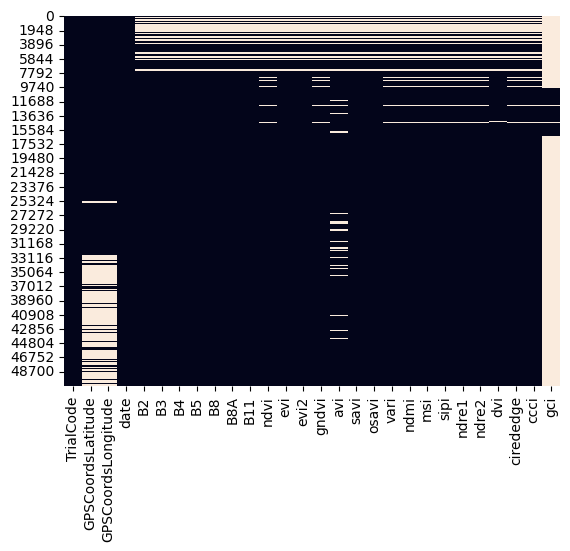

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_sentinel2.isna(), cbar=False)
plt.show()

In [4]:
df_sentinel2.shape

(50647, 28)

In [5]:
df_sentinel2['TrialCode'].unique()

array(['trial_853', 'trial_854', 'trial_857', 'trial_858', 'trial_859',
       'trial_860', 'trial_864', 'trial_865', 'trial_867', 'trial_869',
       'trial_874', 'trial_878', 'trial_880', 'trial_894', 'trial_896',
       'trial_897', 'trial_899', 'trial_901', 'trial_905', 'trial_912',
       'trial_916', 'trial_917', 'trial_918', 'trial_922', 'trial_925',
       'trial_927', 'trial_928', 'trial_929', 'trial_931', 'trial_932',
       'trial_934', 'trial_935', 'trial_937', 'trial_938', 'trial_940',
       'trial_941', 'trial_943', 'trial_944', 'trial_946', 'trial_947',
       'trial_950', 'trial_953', 'trial_956', 'trial_957', 'trial_959',
       'trial_958', 'trial_961', 'trial_962', 'trial_963', 'trial_966',
       'trial_967', 'trial_975', 'trial_979', 'trial_980', 'trial_982',
       'trial_985', 'trial_988', 'trial_989', 'trial_990', 'trial_991',
       'trial_993', 'trial_998', 'trial_1001', 'trial_1007', 'trial_1011',
       'trial_1018', 'trial_1022', 'trial_1024', 'trial_1025'

### EDA for Sentinel 2 Data

In [6]:
df_sentinel2.duplicated().sum()

np.int64(0)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.DataFrame(df_sentinel2.isnull().sum(), columns=['Number of missing values']).transpose()

,TrialCode,GPSCoordsLatitude,GPSCoordsLongitude,date,B2,B3,B4,B5,B8,B8A,B11,ndvi,evi,evi2,gndvi,avi,savi,osavi,vari,ndmi,msi,sipi,ndre1,ndre2,dvi,cirededge,ccci,gci
Number of missing values,0,15044,15044,0,3390,3390,3390,3390,3390,3390,3390,3974,3390,3390,3974,6032,3390,3390,3974,3974,3974,4047,4048,4048,3463,4048,4121,44296


## Distribution of Spectral Indeices

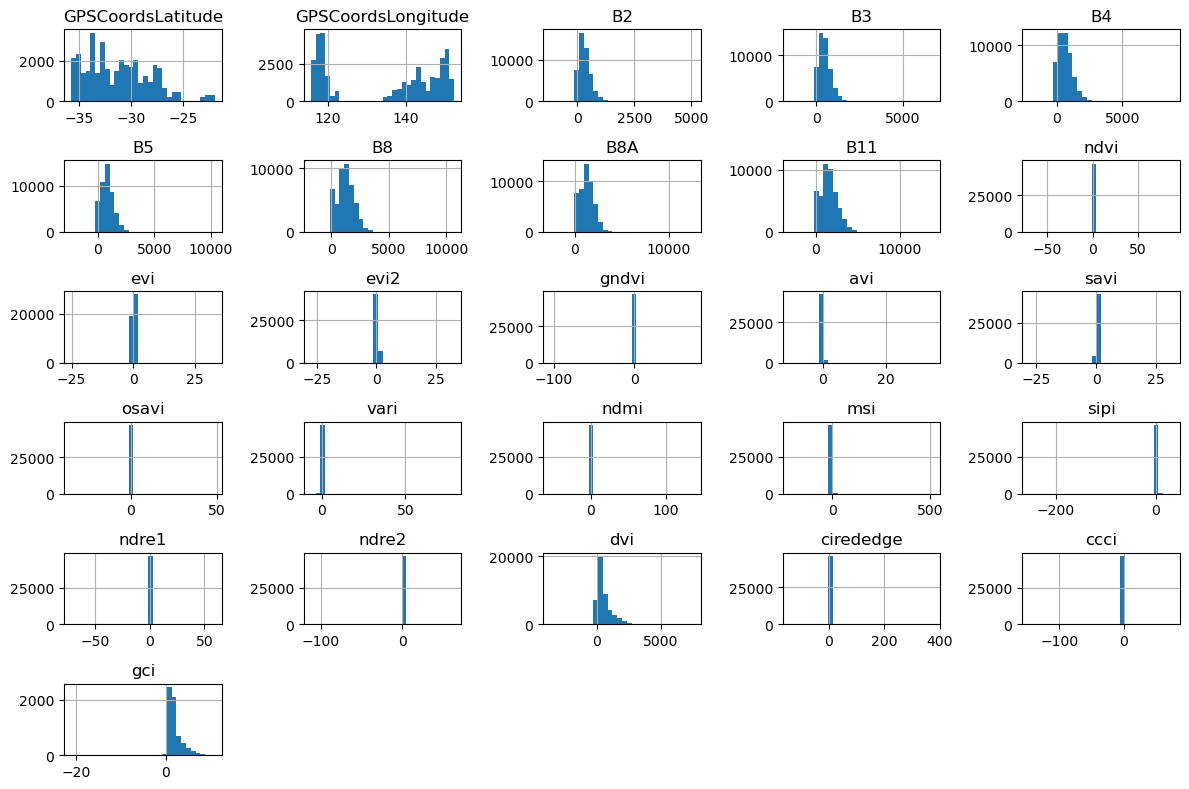

In [8]:
import matplotlib.pyplot as plt

df_sentinel2.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Handle missing values

In [9]:
pd.set_option('display.max_columns', None)



df_sentinel2 = df_sentinel2.drop('gci', axis=1)

#print(df_sentinel.shape)
rows_with_missing = df_sentinel2.isnull().any(axis=1).sum()
print(f"Rows with missing values: {rows_with_missing}")

# no missing values found

Rows with missing values: 20857


In [10]:
df_sentinel2.columns

Index(['TrialCode', 'GPSCoordsLatitude', 'GPSCoordsLongitude', 'date', 'B2',
       'B3', 'B4', 'B5', 'B8', 'B8A', 'B11', 'ndvi', 'evi', 'evi2', 'gndvi',
       'avi', 'savi', 'osavi', 'vari', 'ndmi', 'msi', 'sipi', 'ndre1', 'ndre2',
       'dvi', 'cirededge', 'ccci'],
      dtype='object')

In [11]:
missing_counts = df_sentinel2.isna().sum(axis=1)

total_columns = df_sentinel2.shape[1]
threshold = total_columns * 0.5
  # Adjust threshold as needed (e.g., 2)

# Filter rows with many missing values
#rows_with_many_missing = df_sentinel2[missing_counts > threshold]
#remove rows with many missing values
df_sentinel2 = df_sentinel2[missing_counts <= threshold]
df_sentinel2.shape

(47257, 27)

In [ ]:
pd.DataFrame(df_sentinel2.isnull().sum(), columns=['Number of missing values'])

,TrialCode,GPSCoordsLatitude,GPSCoordsLongitude,date,B2,B3,B4,B5,B8,B8A,B11,ndvi,evi,evi2,gndvi,avi,savi,osavi,vari,ndmi,msi,sipi,ndre1,ndre2,dvi,cirededge,ccci
Number of missing values,0,14970,14970,0,0,0,0,0,0,0,0,584,0,0,584,2642,0,0,584,584,584,657,658,658,73,658,731


## Median Imputation

In [13]:
cols_to_impute = ['B2',
       'B3', 'B4', 'B5', 'B8', 'B8A', 'B11', 'ndvi', 'evi', 'evi2', 'gndvi',
       'avi', 'savi', 'osavi', 'vari', 'ndmi', 'msi', 'sipi', 'ndre1', 'ndre2',
       'dvi', 'cirededge', 'ccci']
df_sentinel2[cols_to_impute] = df_sentinel2[cols_to_impute].fillna(df_sentinel2[cols_to_impute].median())
pd.DataFrame(df_sentinel2.isnull().sum(), columns=['Number of missing values']).transpose()


#used median method to impute missing values because data is skewed

,TrialCode,GPSCoordsLatitude,GPSCoordsLongitude,date,B2,B3,B4,B5,B8,B8A,B11,ndvi,evi,evi2,gndvi,avi,savi,osavi,vari,ndmi,msi,sipi,ndre1,ndre2,dvi,cirededge,ccci
Number of missing values,0,14970,14970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
pd.DataFrame(df_sentinel2.isnull().sum(), columns=['Number of missing values']).transpose()
df_sentinel2.head()

,TrialCode,GPSCoordsLatitude,GPSCoordsLongitude,date,B2,B3,B4,B5,B8,B8A,B11,ndvi,evi,evi2,gndvi,avi,savi,osavi,vari,ndmi,msi,sipi,ndre1,ndre2,dvi,cirededge,ccci
0,trial_853,-29.608871,117.864238,1/01/2016,24.151196,34.741899,33.681885,40.487515,21.231858,0.082521,46.762923,-69.470152,-25.119089,-27.575691,-104.419609,-1.632267,-27.755336,-34.422270,79.182372,-53.472267,87.010811,-252.421003,-72.199740,-112.096881,-12.423340,-140.503420,-146.889462
1,trial_853,-29.608871,117.864238,6/01/2016,23.895531,34.376891,33.343544,40.098111,20.912442,0.011518,46.271523,-69.044853,-25.026654,-27.438960,-103.523760,-1.735765,-27.622388,-34.233192,78.348701,-53.189492,86.791839,-249.037811,-71.652671,-111.195960,-12.404655,-138.900292,-145.864121
2,trial_853,-29.608871,117.864238,11/01/2016,23.568859,33.909663,32.909014,39.594104,20.517102,-0.071665,45.644905,-68.457951,-24.885462,-27.242920,-102.347011,-1.851882,-27.430771,-33.967580,77.283589,-52.791139,86.429737,-244.821950,-70.921241,-110.004364,-12.365778,-136.826829,-144.490918
3,trial_853,-29.608871,117.864238,16/01/2016,23.162921,33.328248,32.366606,38.960864,20.040409,-0.165811,44.867267,-67.679526,-24.683840,-26.975197,-100.848839,-1.977926,-27.168019,-33.610330,75.959932,-52.253464,85.883561,-239.694177,-69.975836,-108.477668,-12.300460,-134.227805,-142.710230
4,trial_853,-29.608871,117.864238,21/01/2016,22.670748,32.622539,31.706285,38.185694,19.478777,-0.269081,43.925205,-66.681109,-24.410153,-26.623749,-98.992884,-2.110366,-26.821944,-33.146874,74.354746,-51.553428,85.111305,-233.593575,-68.789255,-106.575414,-12.202256,-131.058488,-140.465839


In [15]:
df_sentinel2.shape

(47257, 27)

In [16]:
df_sentinel2['TrialCode'].unique()

array(['trial_853', 'trial_854', 'trial_858', 'trial_859', 'trial_867',
       'trial_869', 'trial_894', 'trial_896', 'trial_899', 'trial_927',
       'trial_929', 'trial_932', 'trial_934', 'trial_938', 'trial_941',
       'trial_943', 'trial_950', 'trial_953', 'trial_957', 'trial_961',
       'trial_963', 'trial_979', 'trial_982', 'trial_985', 'trial_988',
       'trial_989', 'trial_991', 'trial_998', 'trial_1001', 'trial_1007',
       'trial_1011', 'trial_1018', 'trial_1025', 'trial_1035',
       'trial_1040', 'trial_1045', 'trial_1049', 'trial_1054',
       'trial_1058', 'trial_1059', 'trial_1060', 'trial_1061',
       'trial_1064', 'trial_1067', 'trial_1070', 'trial_1072',
       'trial_1075', 'trial_1077', 'trial_1079', 'trial_1080',
       'trial_1084', 'trial_1095', 'trial_1096', 'trial_1097',
       'trial_1099', 'trial_1100', 'trial_1109', 'trial_1110',
       'trial_1111', 'trial_1115', 'trial_1116', 'trial_1120',
       'trial_1121', 'trial_1122', 'trial_1130', 'trial_1136',

In [17]:
import re

def extract_trials(code):
    # Extract all occurrences of trial_X where X is anything but empty
    trials = re.findall(r'trial_[^_]+', code)
    return trials

# Apply and explode
df_sentinel2['TrialCode'] = df_sentinel2['TrialCode'].apply(extract_trials)
df_sentinel2 = df_sentinel2.explode('TrialCode')


In [18]:
df_sentinel2['TrialCode'].unique()

array(['trial_853', 'trial_854', 'trial_858', 'trial_859', 'trial_867',
       'trial_869', 'trial_894', 'trial_896', 'trial_899', 'trial_927',
       'trial_929', 'trial_932', 'trial_934', 'trial_938', 'trial_941',
       'trial_943', 'trial_950', 'trial_953', 'trial_957', 'trial_961',
       'trial_963', 'trial_979', 'trial_982', 'trial_985', 'trial_988',
       'trial_989', 'trial_991', 'trial_998', 'trial_1001', 'trial_1007',
       'trial_1011', 'trial_1018', 'trial_1025', 'trial_1035',
       'trial_1040', 'trial_1045', 'trial_1049', 'trial_1054',
       'trial_1058', 'trial_1059', 'trial_1060', 'trial_1061',
       'trial_1064', 'trial_1067', 'trial_1070', 'trial_1072',
       'trial_1075', 'trial_1077', 'trial_1079', 'trial_1080',
       'trial_1084', 'trial_1095', 'trial_1096', 'trial_1097',
       'trial_1099', 'trial_1100', 'trial_1109', 'trial_1110',
       'trial_1111', 'trial_1115', 'trial_1116', 'trial_1120',
       'trial_1121', 'trial_1122', 'trial_1130', 'trial_1136',

## Join with the Centralised dataFrame called (df_centralised)

In [19]:
file_path = Path("intermediate_tables") / "parquet_files" / "processed_weather_and_crop_data.parquet"
df_centralised = pd.read_parquet(file_path, engine='pyarrow')

In [20]:
cols_to_keep = ['ndvi', 'evi', 'evi2', 'gndvi',
       'avi', 'savi', 'osavi', 'vari', 'ndmi', 'msi', 'sipi', 'ndre1', 'ndre2',
       'dvi', 'cirededge', 'ccci']
df_sentinel2 = df_sentinel2.groupby('TrialCode')[cols_to_keep].mean().reset_index()
df_centralised = pd.merge(df_centralised, df_sentinel2, on='TrialCode', how='left')

In [21]:
df_centralised.shape

(110187, 35)

In [22]:
pd.DataFrame(df_centralised.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Year,0
Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SowingDate,0
HarvestDate,0
Abandoned,0
CultivarID,0


### Only keep rows with sentinel 2 data

In [23]:
df_centralised = df_centralised.dropna()

In [24]:
pd.DataFrame(df_centralised.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Year,0
Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SowingDate,0
HarvestDate,0
Abandoned,0
CultivarID,0


In [ ]:
file_path = Path("intermediate_tables") / "parquet_files" / "processed_weather_crop_sentinel2_data.parquet"

file_path = file_path.resolve()
df_centralised.to_parquet(file_path, index=False, engine='pyarrow')

In [26]:
file_path = Path("intermediate_tables") / "csv_files" / "processed_weather_crop_sentinel2_data.csv"

file_path = file_path.resolve()
df_centralised.to_csv(file_path, index=False)